In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_excel("owid-covid-data.xlsx")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
2714,ALB,Europe,Albania,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2715,ALB,Europe,Albania,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2716,ALB,Europe,Albania,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2717,ALB,Europe,Albania,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2718,ALB,Europe,Albania,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN


In [ ]:
# check for overall missingness
missing_values_by_location = europe_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
columns_to_exclude = ["iso_code", "continent", "location", "date"]
missing_values_df['sum_missing'] = missing_values_df.drop(columns=columns_to_exclude).sum(axis=1)
missing_total_by_location = missing_values_df[['location', 'sum_missing']]
missing_total_by_location = missing_total_by_location.sort_values(by='sum_missing', ascending=True)
missing_total_by_location.head(20)

,location,sum_missing
location,,
Italy,0,18094
Belgium,0,20668
France,0,21166
Estonia,0,23902
Switzerland,0,25625
Spain,0,25661
Lithuania,0,26176
Luxembourg,0,26640
Ireland,0,27108


In [7]:
# pick countries that have relatively low missingness and that are adjacent 
netherlands = ['Netherlands']
selected_data = europe_data[europe_data['location'].isin(netherlands)]
selected_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
209607,NLD,Europe,Netherlands,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,NaN,NaN,NaN,NaN
209608,NLD,Europe,Netherlands,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,NaN,NaN,NaN,NaN
209609,NLD,Europe,Netherlands,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,-259.2,-7.71,-7.71,-14.867022
209610,NLD,Europe,Netherlands,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,NaN,NaN,NaN,NaN
209611,NLD,Europe,Netherlands,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,NaN,NaN,NaN,NaN


In [46]:
netherlands_data = data[data['location'] == 'Netherlands']
netherlands_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
209607,NLD,Europe,Netherlands,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,NaN,NaN,NaN,NaN
209608,NLD,Europe,Netherlands,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,NaN,NaN,NaN,NaN
209609,NLD,Europe,Netherlands,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,-259.2,-7.71,-7.71,-14.867022
209610,NLD,Europe,Netherlands,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,NaN,NaN,NaN,NaN
209611,NLD,Europe,Netherlands,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,27.3,NaN,3.32,82.28,0.944,17564020,NaN,NaN,NaN,NaN


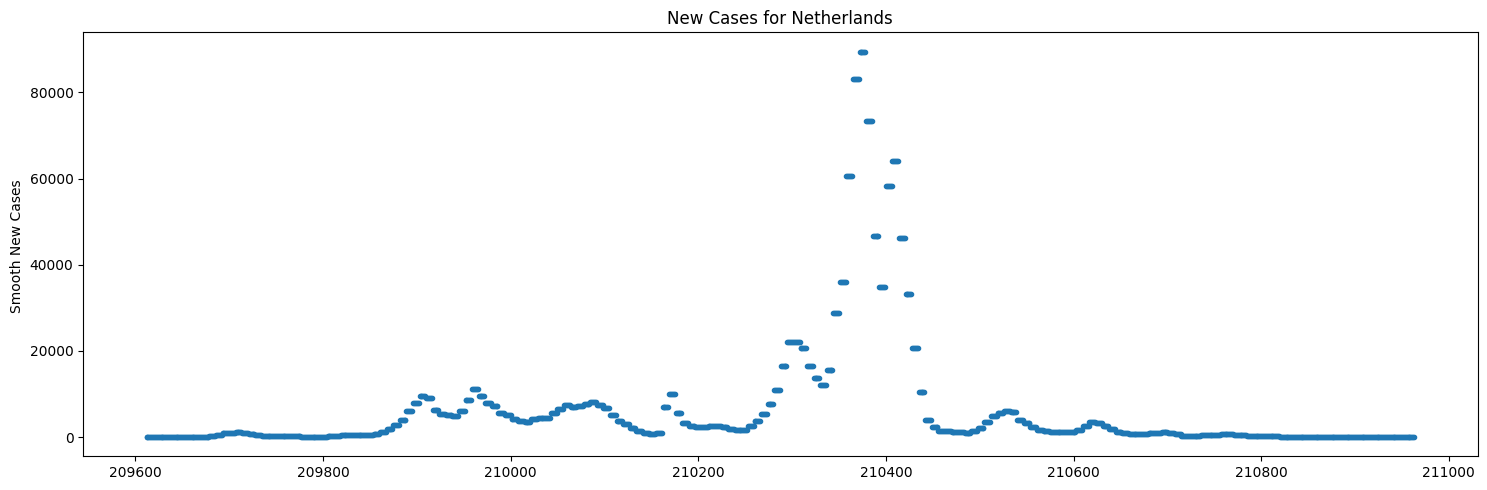

In [49]:
## Netherlands Plot

plt.figure(figsize=(15, 5))
netherlands_data['new_cases_smoothed'].plot(style='.', title=f'New Cases for Netherlands')
plt.ylabel('Smooth New Cases ')

plt.tight_layout()
plt.show()

In [51]:
#data missingness
missing_data = netherlands_data.isnull().sum()
threshold = 0.4 * len(netherlands)
missing_data = missing_data[missing_data < threshold]
missing_data

iso_code                      0
continent                     0
location                      0
date                          0
new_cases                     0
new_deaths                    0
new_cases_per_million         0
new_deaths_per_million        0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
population                    0
dtype: int64

In [52]:
#impute using forward fill

# Find the first day where 'new_cases_smoothed' is not null
first_valid_date = data_clean[data_clean['new_cases_smoothed'].notna()].index[0]

# fill everything before that day with 0
data_clean.loc[data_clean.index < first_valid_date, ['new_cases_smoothed']] = 0

# forward fill
data_clean['new_cases_smoothed'].ffill()

# check missingness
missing_values_count = data_clean['new_cases_smoothed'].isnull().sum()
print(missing_values_count)

0


In [53]:
data_clean.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
209607,NLD,Europe,Netherlands,2020-01-03,NaN,0.0,0.0,NaN,0.0,NaN,...,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.944,17564020
209608,NLD,Europe,Netherlands,2020-01-04,NaN,0.0,0.0,NaN,0.0,NaN,...,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.944,17564020
209609,NLD,Europe,Netherlands,2020-01-05,NaN,0.0,0.0,NaN,0.0,NaN,...,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.944,17564020
209610,NLD,Europe,Netherlands,2020-01-06,NaN,0.0,0.0,NaN,0.0,NaN,...,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.944,17564020
209611,NLD,Europe,Netherlands,2020-01-07,NaN,0.0,0.0,NaN,0.0,NaN,...,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.944,17564020


<Figure size 1000x600 with 0 Axes>

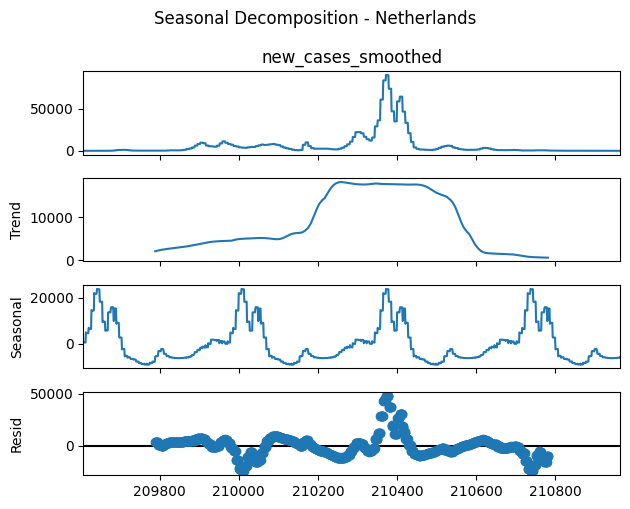

In [54]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


for country in data_clean['location'].unique():
    country_data = data_clean[data_clean['location'] == country]
    result = seasonal_decompose(country_data['new_cases_smoothed'], period=365)
    
    plt.figure(figsize=(10, 6))
    
    # Create plots
    result.plot()
    
    # Set the title with a higher y value to shift it up
    plt.suptitle(f'Seasonal Decomposition - {country}', y=1.05)
    
    # Save the figure with a lowercase country name
    plt.savefig('acf_plot_' + country.lower() + '.png')
    
    # Display the figure
    plt.show()

In [55]:
from statsmodels.tsa.stattools import adfuller

for country in data_clean['location'].unique():
    country_data = data_clean[data_clean['location'] == country]
    result = adfuller(country_data['new_cases_smoothed'].values)
    
    print(f'Results for {country}:')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('---------------------------------------------')

Results for Netherlands:
ADF Statistic: -2.848072
p-value: 0.051728
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------


In [56]:
data_clean_prepped = data_clean.loc[:, ['new_cases_smoothed']]
# test train split
train_size = 0.8  
split_idx = int(len(data_clean_prepped) * train_size)
train = data_clean_prepped.iloc[:split_idx]
test = data_clean_prepped.iloc[split_idx:]


print('Train set shape:', train.shape)
print('Test set shape:', test.shape)


Train set shape: (1085, 1)
Test set shape: (272, 1)


In [57]:
train.head(30)


,new_cases_smoothed
209607,0.0
209608,0.0
209609,0.0
209610,0.0
209611,0.0
209612,0.0
209613,0.0
209614,0.0
209615,0.0
209616,0.0


In [60]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error



# Using auto_arima to find the best order
model = auto_arima(train, start_p=1, start_d=1, start_q=1, max_p=6, max_d=3, max_q=6, seasonal=False,
                   stepwise=True, trace=True, error_action='ignore', suppress_warnings=True, 
                   scoring='mse')

# Getting the best ARIMA order
best_order = model.get_params()['order']

# Training the ARIMA model on the best order
best_model = ARIMA(train, order=best_order)
model_fit = best_model.fit()

# Hypothesis on testing data
predicted_values = model_fit.forecast(steps=len(test))

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test, predicted_values))

# Print RSME and best order
print("Best ARIMA Order:", best_order)
print("Root Mean Squared Error (RMSE):", rmse)


Performing stepwise search to minimize aic


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19513.555, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19509.547, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19511.548, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19511.555, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19507.548, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.880 seconds
Best ARIMA Order: (0, 1, 0)
Root Mean Squared Error (RMSE): 701.6255786331072


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


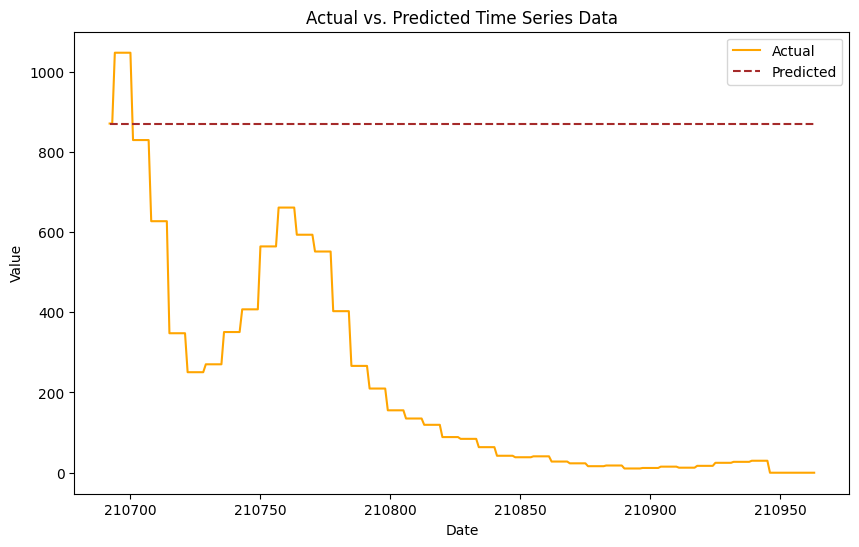

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='orange')
plt.plot(test.index, predicted_values, label='Predicted', linestyle='--', color='brown')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Time Series Data')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Train RMSE: 1953.981019511541
Test RMSE: 701.6255786331072


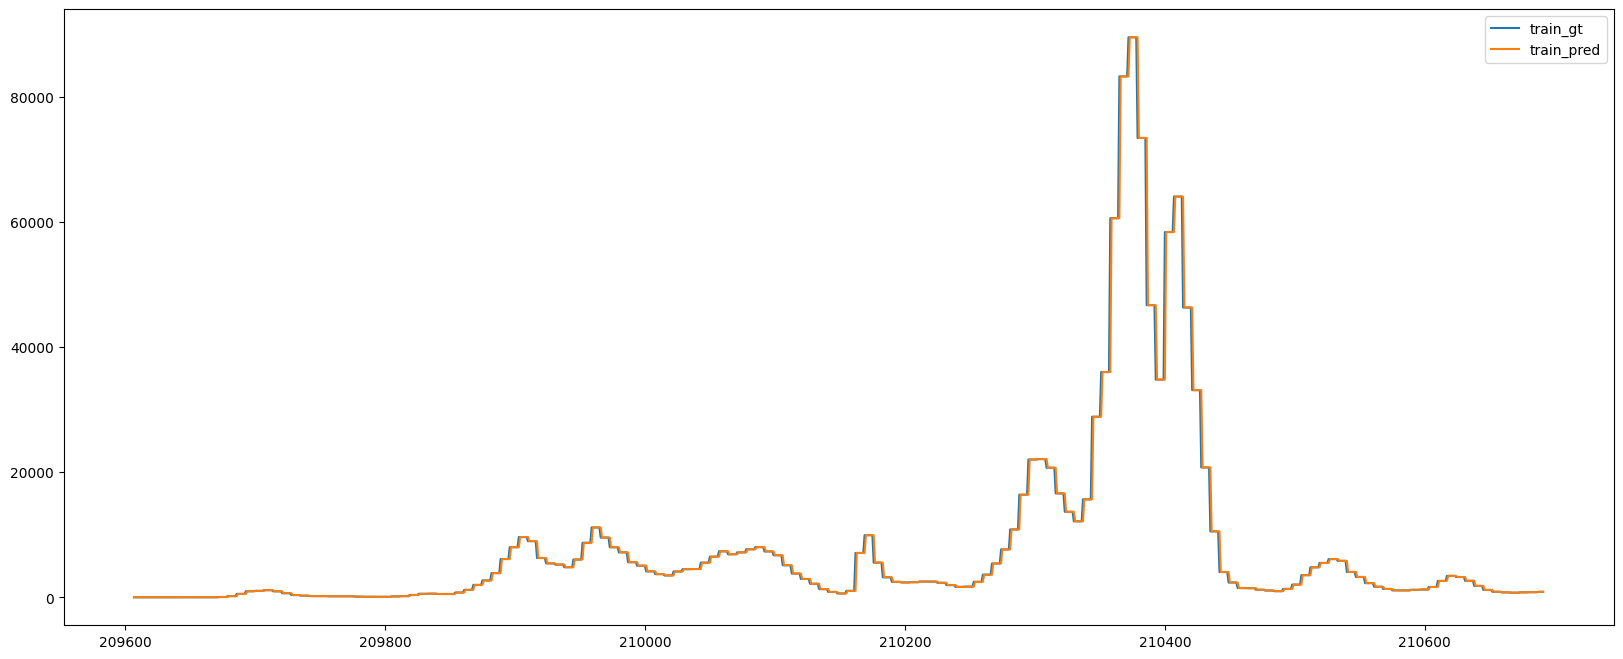

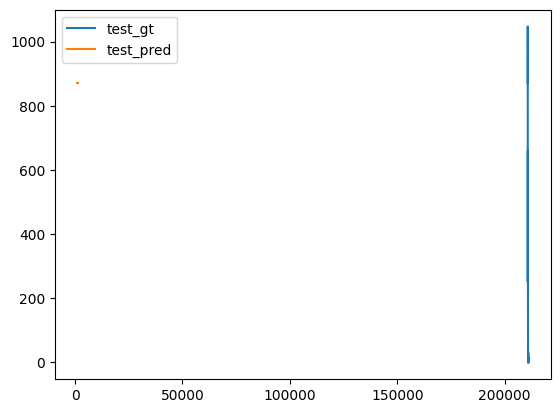

In [62]:
model = ARIMA(train, order=(2, 1, 2))
model=model.fit()
train_pred=model.fittedvalues
pd.concat([train, train_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['train_gt', 'train_pred'])
test_pred=model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
pd.concat([test, test_pred], axis=1).plot()
plt.legend(['test_gt', 'test_pred'])
train_rmse = np.sqrt(mean_squared_error(train, train_pred))
test_rmse = np.sqrt(mean_squared_error(test, test_pred))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

